# BIRDS

This is a small project utilizing the transformer architecture to generate new bird common names.

In [2]:
import csv

filename = 'birds.csv' # donwloaded from https://www.kaggle.com/datasets/thepushkarp/common-bird-names?resource=download
# data = pd.read_csv(filename, index_col=0)

with open(filename, newline='') as f:
    reader = csv.reader(f)
    # data = {int(i)-1:n for i,n in list(reader)[1:]}
    data = [n for _,n in list(reader)[1:]]

print(*data, sep='\n')

Abbott's babbler
Abbott's booby
Abbott's starling
Abbott's sunbird
Abd al-Kuri sparrow
Abdim's stork
Aberdare cisticola
Aberrant bush warbler
Abert's towhee
Abyssinian catbird
Abyssinian crimsonwing
Abyssinian ground hornbill
Abyssinian ground thrush
Abyssinian longclaw
Abyssinian owl
Abyssinian roller
Abyssinian scimitarbill
Abyssinian slaty flycatcher
Abyssinian thrush
Abyssinian waxbill
Abyssinian wheatear
Abyssinian white-eye
Abyssinian woodpecker
Acacia pied barbet
Acacia tit
Acadian flycatcher
Aceh bulbul
Acorn woodpecker
Acre antshrike
Acre tody-tyrant
Adamawa turtle dove
Adelaide's warbler
Admiralty cicadabird
Adélie penguin
Afep pigeon
Afghan babbler
Afghan snowfinch
African barred owlet
African black duck
African black swift
African blue flycatcher
African blue tit
African broadbill
African citril
African collared dove
African crake
African crimson-winged finch
African cuckoo
African cuckoo-hawk
African darter
African desert warbler
African dusky flycatcher
African dwarf king

In [3]:
len(data)

10976

In [4]:
import random as rn

rn.choices(data, k=10)

['Black-and-crimson oriole',
 "Heermann's gull",
 'Black-crowned tityra',
 'Taiwan barbet',
 'Cuban bullfinch',
 'Junin tapaculo',
 'Gray catbird',
 'Henderson fruit dove',
 'Red-headed bunting',
 "Stierling's woodpecker"]

In [5]:
data_lower = list(map(str.lower, data))
data_lower

["abbott's babbler",
 "abbott's booby",
 "abbott's starling",
 "abbott's sunbird",
 'abd al-kuri sparrow',
 "abdim's stork",
 'aberdare cisticola',
 'aberrant bush warbler',
 "abert's towhee",
 'abyssinian catbird',
 'abyssinian crimsonwing',
 'abyssinian ground hornbill',
 'abyssinian ground thrush',
 'abyssinian longclaw',
 'abyssinian owl',
 'abyssinian roller',
 'abyssinian scimitarbill',
 'abyssinian slaty flycatcher',
 'abyssinian thrush',
 'abyssinian waxbill',
 'abyssinian wheatear',
 'abyssinian white-eye',
 'abyssinian woodpecker',
 'acacia pied barbet',
 'acacia tit',
 'acadian flycatcher',
 'aceh bulbul',
 'acorn woodpecker',
 'acre antshrike',
 'acre tody-tyrant',
 'adamawa turtle dove',
 "adelaide's warbler",
 'admiralty cicadabird',
 'adélie penguin',
 'afep pigeon',
 'afghan babbler',
 'afghan snowfinch',
 'african barred owlet',
 'african black duck',
 'african black swift',
 'african blue flycatcher',
 'african blue tit',
 'african broadbill',
 'african citril',
 'afr

In [6]:
chars = set()
for s in data_lower:
    chars = chars.union(s)
chars = sorted(list(chars))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 '-.abcdefghijklmnopqrstuvwxyzáãäèéíñóôöúüāēōūʻ
47


In [7]:
chars_to_drop = list(chars[30:]) + ['.']
print(''.join(chars_to_drop))

áãäèéíñóôöúüāēōūʻ.


In [8]:
chars_to_drop_set = set(chars_to_drop)
data_to_drop = list(filter(lambda n: chars_to_drop_set.intersection(n), data_lower))
print(f'To drop {len(data_to_drop)} out of {len(data)}, {len(data_to_drop)/len(data)*100:.2f}%')
print(*data_to_drop, sep='\n')

To drop 159 out of 10976, 1.45%
adélie penguin
alström's warbler
annobón paradise flycatcher
annobón white-eye
apurímac brushfinch
apurímac spinetail
atitlán grebe
baudó oropendola
bogotá rail
brasília tapaculo
böhm's bee-eater
böhm's flycatcher
böhm's spinetail
caquetá seedeater
ceará gnateater
chiloé wigeon
chocó poorwill
chocó screech owl
chocó tapaculo
chocó trogon
chocó vireo
chocó woodpecker
clarión wren
córdoba cinclodes
española cactus finch
fülleborn's boubou
fülleborn's longclaw
galápagos dove
galápagos martin
galápagos mockingbird
galápagos petrel
galápagos shearwater
greater ʻamakihi
güldenstädt's redstart
hawaiʻi creeper
hawaiʻi ʻakepa
hawaiʻi ʻamakihi
hawaiʻi ʻelepaio
hawaiʻi ʻōʻō
juan fernández firecrown
juan fernández petrel
juan fernández tit-tyrant
junín canastero
kauaʻi nukupuʻu
kauaʻi ʻakialoa
kauaʻi ʻamakihi
kauaʻi ʻelepaio
kauaʻi ʻōʻō
kererū
krüper's nuthatch
kākāwahie
kāmaʻo
lesser ʻakialoa
lühder's bushshrike
lānaʻi hookbill
manicoré warbling antbird
marañón cre

In [9]:
data_filtered = list(filter(lambda n: not chars_to_drop_set.intersection(n), data_lower))
print(f'Remaining {len(data_filtered)} out of {len(data)}, {len(data_filtered)/len(data)*100:.2f}%')
print(*(data_filtered[:10]), sep='\n')

Remaining 10817 out of 10976, 98.55%
abbott's babbler
abbott's booby
abbott's starling
abbott's sunbird
abd al-kuri sparrow
abdim's stork
aberdare cisticola
aberrant bush warbler
abert's towhee
abyssinian catbird


In [10]:
chars = set()
for s in data_filtered:
    chars = chars.union(s)
chars = list(sorted(chars))
chars = ['#'] + chars
vocab_size = len(chars)
print(''.join(sorted(chars)))
print(vocab_size)

 #'-abcdefghijklmnopqrstuvwxyz
30


In [11]:
ch2i = { ch:i for i,ch in enumerate(chars)}
i2ch = { i:ch for i,ch in enumerate(chars)}
encode = lambda st: [ch2i[ch] for ch in st]
decode = lambda l: [i2ch[i] for i in l]

In [12]:
data_filtered[0], encode(data_filtered[0]), ''.join(decode(encode(data_filtered[0])))

("abbott's babbler",
 [4, 5, 5, 18, 23, 23, 2, 22, 1, 5, 4, 5, 5, 15, 8, 21],
 "abbott's babbler")

In [13]:
min([len(n) for n in data_filtered]), max([len(n) for n in data_filtered])

(3, 35)

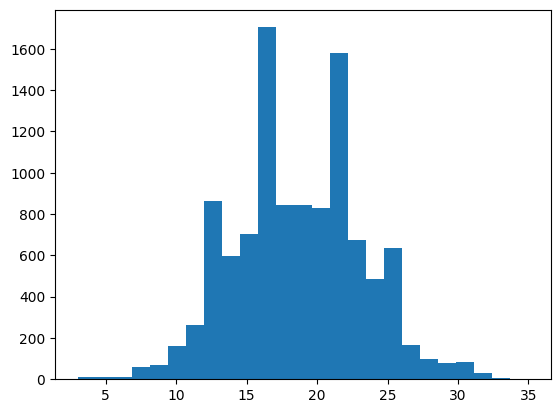

In [14]:
from matplotlib import pyplot as plt

plt.hist([len(n) for n in data_filtered], bins=25);

In [15]:
print(*sorted(data_filtered, key=len)[:10], sep='\n')

emu
kea
mao
tui
dodo
huia
kagu
nene
rook
ruff


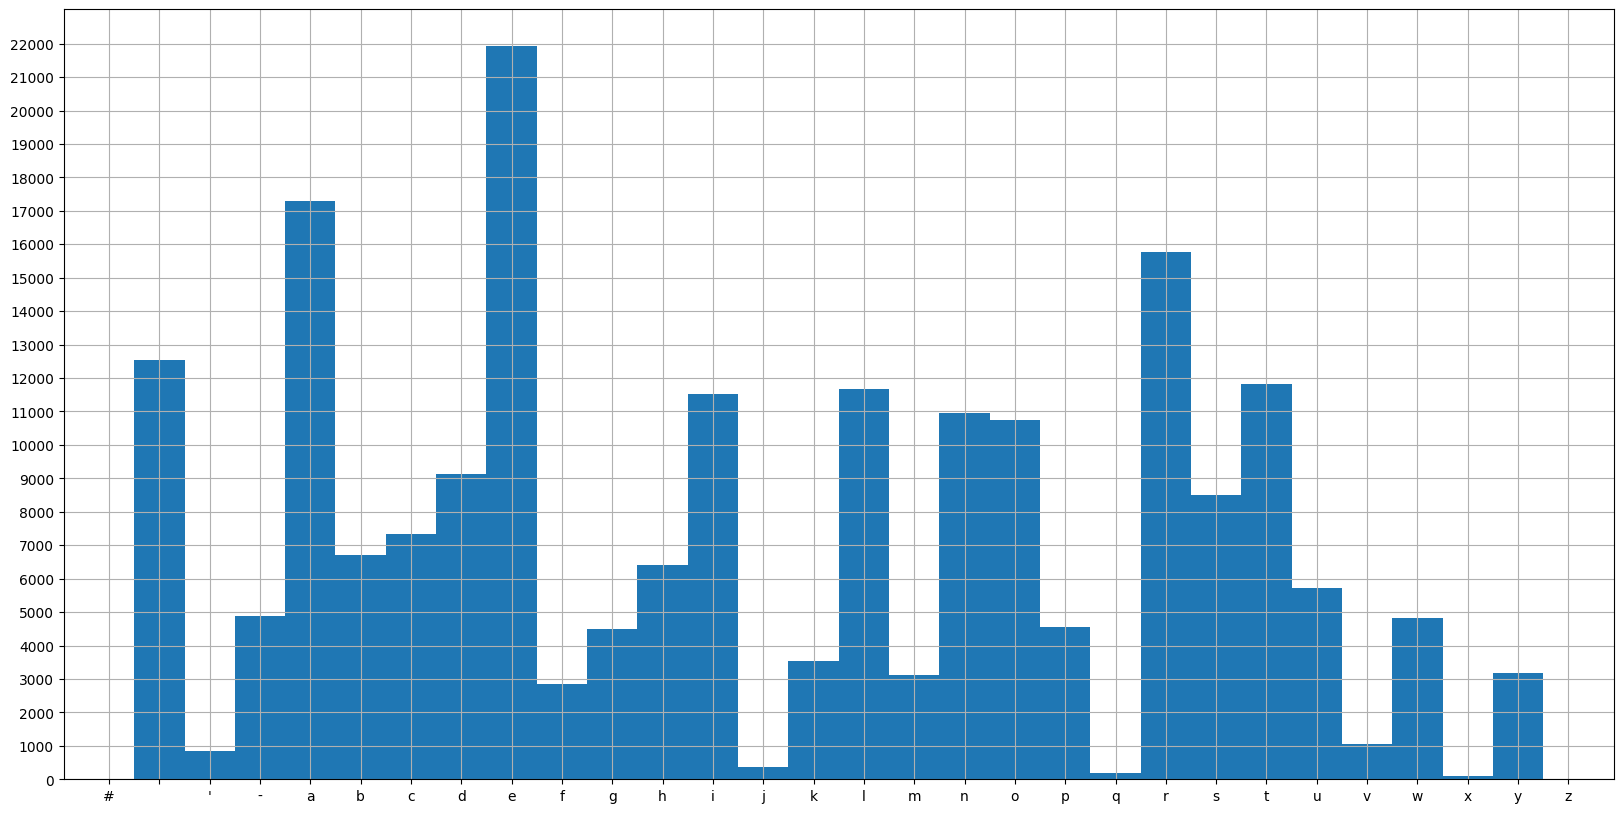

In [40]:
all = []

for n in data_filtered:
    all.extend(encode(n))

plt.figure(figsize=(20,10));
plt.hist(all, bins=vocab_size-2);
plt.xticks([x+.5 for x in range(vocab_size)], [i2ch[i] for i in range(vocab_size)]);
plt.yticks(range(0, 23000, 1000));
plt.grid(True);